In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
df_density = pd.read_excel('density.xlsx')
df_data = pd.read_csv('coople_data.csv')
df_lat = pd.read_csv('post-codes.csv')

In [2]:
df_merge = df_data.merge(df_density, on = 'Post Code',how = 'left')

In [3]:
df_merge

,Unnamed: 0,Rank,Job role,Experience Level,Experience detail,Job description,Industry,City_x,Post Code,Pay total,Pay per hour,Start date,Shift,City_y,Region,Population,Area,Density
0,0,1,Service Gastronomie,Ungelernt mit >20 Monaten Erfahrung,Personen ohne eidgenössisches Fähigkeitszeugni...,Travail usuel de chef de rang:\n- Mise en plac...,Gastronomie / Hotel,Neuchâtel,2000,227.25,30.30,22 Aug 2023,1,Neuchâtel,Canton of Neuchâtel,32376.0,31.600,1024.556962
1,1,2,Logistiker/in,Ungelernt,Personen mit Bereitschaft zu körperlicher Arbe...,Funktionsumschreibung\n* Der/Die Rangierdienst...,Promotion / Event,Spreitenbach,8957,34444.75,29.00,22 Aug 2023,132,Spreitenbach,Aargau,11587.0,8.600,1347.325581
2,2,3,Verkaufsmitarbeiter/in / Detailhandel,Ungelernt,Verkaufsmitarbeiter/in mit Freude am Verkauf u...,Aufgaben:\n- Auffülltätigkeiten (Non Food Bere...,Detailhandel / Logistik,Rüschlikon,8803,16605.00,27.00,23 Aug 2023,82,NaN,Canton of Zürich,6769.0,4.632,1461.355786
3,3,4,Logistiker/in,Ungelernt,Personen mit Bereitschaft zu körperlicher Arbe...,"Entgegennahme von Ware, Bereitstellung von War...",Promotion / Event,Zürich-Flughafen,8058,1785.38,26.45,23 Aug 2023,9,Seebach (Zürich),Canton of Zürich,NaN,NaN,NaN
4,4,5,Logistiker/in,Ungelernt mit >20 Monaten Erfahrung,Der Nachweis über >20 Monate Praxiserfahrung i...,!Die Einsatzzeiten im sind fiktiv!Den genauen ...,Promotion / Event,Willisau,6130,6048.00,27.00,23 Aug 2023,28,NaN,Canton of Lucerne,6931.0,33.400,207.514970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,1332,1371,Service Gastronomie,Ungelernt,Servicemitarbeiter/in mit Freude am Bedienen u...,Wir suchen fröhliche Servicemitarbeiter:in für...,Gastronomie / Hotel,Vaz/Obervaz,7078,224.00,28.00,31 Dec 2023,1,Lenzerheide,Graubünden,1663.0,27.000,61.592593
1342,1333,1372,Barmitarbeiter,NaN,NaN,Wir suchen erfahrener:n Barkeeper:in für unser...,Gastronomie / Hotel,Vaz/Obervaz,7078,54.00,27.00,31 Dec 2023,1,Lenzerheide,Graubünden,1663.0,27.000,61.592593
1343,1334,1373,Service Gastronomie,Gelernt,Personen mit eidgenössischem Fähigkeitsausweis...,"Führen der eigenen Station, inkl. Inkasso.\nEr...",Gastronomie / Hotel,Valbella,7077,7803.00,34.00,26 Jan 2024,27,Vaz/Obervaz,Graubünden,756.0,6.200,121.935484
1344,1335,1374,Service Gastronomie,Gelernt,Personen mit eidgenössischem Fähigkeitsausweis...,Möchtest du in der wunderschönen arbeiten? Das...,Gastronomie / Hotel,Valbella,7077,6885.00,34.00,26 Jan 2024,27,Vaz/Obervaz,Graubünden,756.0,6.200,121.935484


In [4]:
df_merge = df_merge.drop(['City_y'],axis=1)

In [5]:
df_merge = df_merge.rename(columns={'City_x': 'City'})
df_merge_lat = df_merge.merge(df_lat.drop_duplicates(['Post Code']), on = 'Post Code',how = 'left')

In [6]:
density = df_merge['Density']
print(min(density),np.mean(density),max(density))

7.8827361563517915 2944.5535389740053 16202.3988005997


In [7]:
df_merge['Urban'] = df_merge['Density']>400

In [8]:
urban_total = df_merge['Urban'].sum()/df_merge['Urban'].count()
urban_total

0.788261515601783

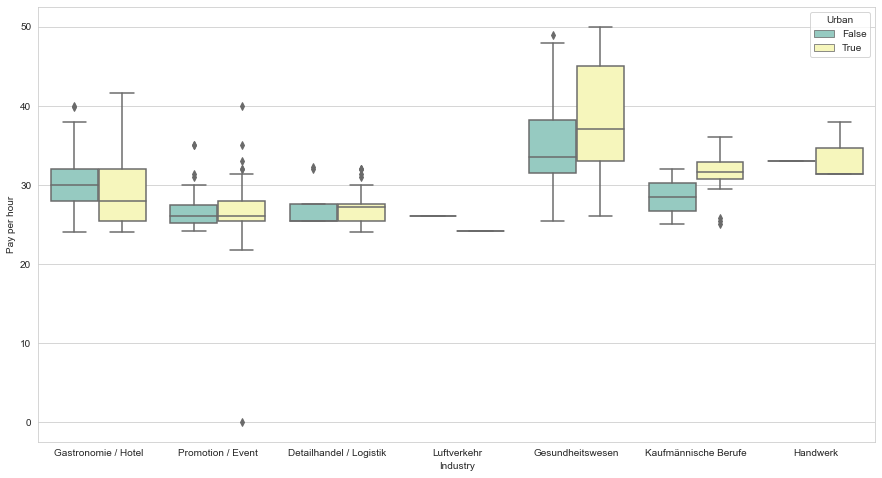

In [9]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Industry", y="Pay per hour", hue="Urban",              
data=df_merge, palette="Set3")

In [10]:
df_merge.to_csv('urban_data.csv')
df_merge_lat.to_csv('urban_data_lat.csv')